In [1]:

from tensorly import tt_to_tensor
import tensorly.decomposition as tl_decomp
import tensorly.tenalg as tl_alg
import numpy as np
import matplotlib.pyplot as plt


In [2]:

# Generate a random 4-dimensional tensor
shape = (5, 4)
tensor = np.random.rand(*shape)

# Perform tensor decomposition using Tucker decomposition
rank = (2, 2)  # Desired ranks for each mode
core, factors = tl_decomp.tucker(tensor, rank)

# Reconstruct the original tensor using the decomposition
# reconstructed_tensor = tl_alg.tt_tensor(factors)

# Calculate the reconstruction error
# reconstruction_error = np.linalg.norm(tensor - reconstructed_tensor)


print("Original Tensor Shape:", shape)
print("Decomposed Core Shape:", core.shape)
print("Decomposed Factors Shapes:", [factor.shape for factor in factors])
# print("Reconstruction Error:", reconstruction_error)
print( tensor.size)
print( core.size)

print(tensor)
print(core)

print(factors)
      


Original Tensor Shape: (5, 4)
Decomposed Core Shape: (2, 2)
Decomposed Factors Shapes: [(5, 2), (4, 2)]
20
4
[[0.32685321 0.50275762 0.11050916 0.79031595]
 [0.80153692 0.79428742 0.96522705 0.51314961]
 [0.04180347 0.7793978  0.84462062 0.69527489]
 [0.39791529 0.37781967 0.26084119 0.69003335]
 [0.35337048 0.52536094 0.41224807 0.0025028 ]]
[[ 2.40837021e+00  1.44312823e-16]
 [-1.84313355e-16  7.38278327e-01]]
[array([[ 0.35843646,  0.64679415],
       [ 0.63205662, -0.43837102],
       [ 0.52434929,  0.03430377],
       [ 0.35237289,  0.42592126],
       [ 0.27003499, -0.45486537]]), array([[ 0.36594432, -0.17579442],
       [ 0.56715417, -0.10067027],
       [ 0.53804006, -0.54057766],
       [ 0.50490968,  0.81654003]])]


In [6]:
test_file = np.load('/home/fun/wildfire_data/Sheep_Fire_2020-08-22/MOD13Q1_2022-07-28.npy')
print(test_file.shape)
test_file1 = np.load('/home/fun/wildfire_data/Sheep_Fire_2020-08-22/MOD13Q1_2022-07-28.npy')

(2, 50, 50)


Original Tensor Shape: (2, 50, 50)
Original Tensor Shape: (1, 50, 50)
Restored Tensor Shape: (2, 50, 50)
Reconstruction Error: 17819.92424852708
original tensor [[5555. 5803. 6524. 5747.]
 [5803. 5611. 7437. 6416.]]
restored_tensor [[5501.852127   5778.53063955 6397.53262355 5576.80173897]
 [5778.53063955 5507.37979591 7196.71180317 6225.64693129]]
error_matrix Error: [[ 53.147873    24.46936045 126.46737645 170.19826103]
 [ 24.46936045 103.62020409 240.28819683 190.35306871]]


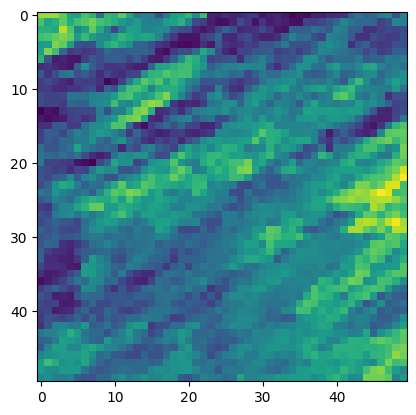

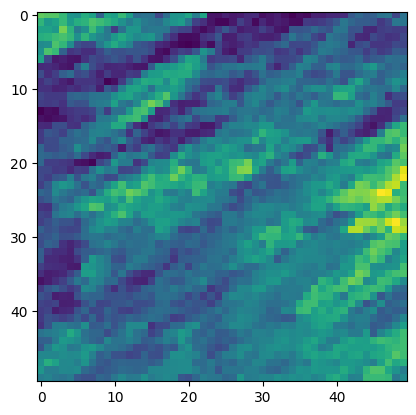

In [11]:


# Generate a random 3-dimensional tensor
shape = test_file.shape
tensor = test_file

# Perform tensor decomposition using Tucker decomposition
rank = (1,50, 50)  # Desired ranks for each mode
core, factors = tl_decomp.tucker(tensor, rank)

# Restore the full tensor from the decomposed core and factor matrices
restored_tensor = tl_alg.multi_mode_dot(core, factors)

# Calculate the reconstruction error
reconstruction_error = np.linalg.norm(tensor - restored_tensor)
error_matrix = tensor - restored_tensor

print("Original Tensor Shape:", shape)
print("Original Tensor Shape:", core.shape)
print("Restored Tensor Shape:", restored_tensor.shape)
print("Reconstruction Error:", reconstruction_error)

print("original tensor", tensor[0,1:3,1:5])
# print("core", core)

# print ("factors", factors)

print ("restored_tensor", restored_tensor[0, 1:3,1:5])

print("error_matrix Error:", error_matrix[0, 1:3,1:5])

img = plt.imshow(tensor[0])
plt.show()

# print(core)
# core[0][0]=0
# plt.imshow(core)
# plt.colorbar()
# plt.show()

img = plt.imshow(restored_tensor[0])
plt.show()

    
    

In [7]:
import tensorly.decomposition as tl_decomp
import tensorly.tenalg as tl_alg
import numpy as np

# Generate a random 3-dimensional tensor
shape = (100, 10, 5)
tensor = np.random.rand(*shape)

# Perform tensor decomposition using Tucker decomposition
rank = (90, 8, 4)  # Desired ranks for each mode
core, factors = tl_decomp.tucker(tensor, rank)

# Restore the full tensor from the decomposed core and factor matrices
restored_tensor = tl_alg.multi_mode_dot(core, factors)

# Calculate the reconstruction error
reconstruction_error = np.linalg.norm(tensor - restored_tensor)
error_matrix = tensor - restored_tensor

print("Original Tensor Shape:", shape)
print("Restored Tensor Shape:", restored_tensor.shape)
print("Reconstruction Error:", reconstruction_error)

print("original tensor", tensor[1:3,1:5,1:2])
# print("core", core)

# print ("factors", factors)

print ("restored_tensor", restored_tensor[1:3,1:5,1:2])

print("error_matrix Error:", error_matrix[1:3,1:5,1:2])

Original Tensor Shape: (100, 10, 5)
Restored Tensor Shape: (100, 10, 5)
Reconstruction Error: 11.364497881287587
original tensor [[[0.23692095]
  [0.36510906]
  [0.23191493]
  [0.17210416]]

 [[0.69348312]
  [0.86043075]
  [0.5499777 ]
  [0.95434633]]]
restored_tensor [[[0.29096174]
  [0.31177374]
  [0.31384788]
  [0.33339266]]

 [[0.64457515]
  [0.68902048]
  [0.49953431]
  [0.96129038]]]
error_matrix Error: [[[-0.05404079]
  [ 0.05333532]
  [-0.08193296]
  [-0.16128851]]

 [[ 0.04890798]
  [ 0.17141027]
  [ 0.05044339]
  [-0.00694405]]]


In [34]:
import numpy as np
import pywt

# Define the dimensions of the tensor
N = 10
frame = 20
channel = 3
w = 50
h = 50

# Generate a random 5-dimensional tensor
input_data = np.random.rand(N, frame, channel, h, w)

# Print the shape of the tensor
print("Tensor Shape:", input_data.shape)




Tensor Shape: (10, 20, 3, 50, 50)


In [49]:

def DWT(image):
    
    h2 = int(image.shape[0]/2) +2
    w2 = int(image.shape[1]/2) +2
    DWT_output = np.zeros([4, h2, w2])
    coeffs = pywt.dwt2(image, 'bior1.3')
    LL, (LH, HL, HH) = coeffs
    
    DWT_output[0] = LL
    DWT_output[1] = LH
    DWT_output[2] = HL
    DWT_output[3] = HH
    
    return DWT_output 

In [51]:
def invDWT(DWTimage):
    reconstructed_image = pywt.idwt2((DWTimage[0], (DWTimage[1],DWTimage[2],DWTimage[3])), 'bior1.3')
    return reconstructed_image

In [67]:
def DWT_tensor(input_data):
    (N, frame, channel, w, h) = input_data.shape
#     shape_DWT = (N, frame, channel*4, int(w/2), int(h/2))
    
    DWT_outputs = np.zeros([N, frame, channel*4, int(w/2), int(h/2)])
    for i in range(N):
        for j in range(frame):
            for k in range(channel):
                DWT_output = DWT(input_data[i,j,k, :,:]) #1: int(w/2)+1, 1:int(h/2)+1]
                DWT_outputs[i, j, k*4:(k+1)*4, :, :] = DWT_output[:,1: int(w/2)+1, 1:int(h/2)+1]
    return DWT_outputs




In [50]:


print("input tensor data shape",input_data.shape)
DWT_tensor_out = DWT_tensor(input_data)
print("output tensor data shape",DWT_tensor_out.shape)

input tensor data shape (10, 20, 3, 50, 50)
output tensor data shape (10, 20, 12, 25, 25)


[[-0.14775426  1.52701228 -0.25325905 -1.27372922  0.22646901]
 [-0.70281465  0.87639391  0.08918015 -1.2912411   1.38840635]
 [-1.65832149  0.72247375  0.74248303  2.87872352 -1.02751852]
 [ 0.84944496 -0.35824445  0.48013397  1.55103683 -1.46231274]
 [ 1.16200616  0.47452259  0.10964871 -1.29470912  0.39991885]]


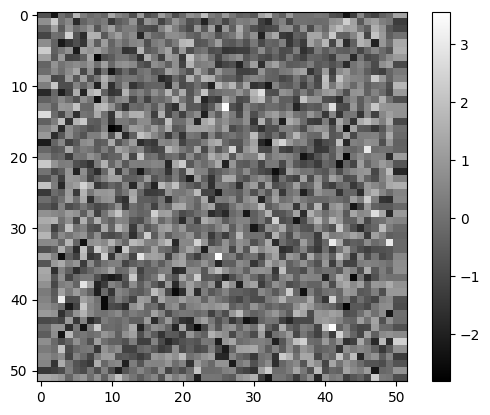

In [66]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

# Define image dimensions
image_height = 100
image_width = 100

# Generate Gaussian random values
mean = 0
stddev = 1
testimage = np.random.normal(mean, stddev, (image_height, image_width))


# print(testimage.shape)
# print(testimage[45:50, 45:50])
DWTimage = DWT(testimage)

print(DWTimage[0, 20:25, 20:25])

recon_image = invDWT(DWTimage)

# print(recon_image[45:50, 45:50])

plt.imshow(DWTimage[1], cmap='gray')
plt.colorbar()
plt.show()
